In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
df = pd.DataFrame()
for day in range(1,5):
    try:
        df_tmp = pd.read_csv(f'https://data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MOPITT/2001/MOP02J-200101{str(day).zfill(2)}-L2V18.0.3.csv', engine='python')
    except Exception:
        continue
    df = pd.concat([df, df_tmp])

In [3]:
df.head()

,# Latitude,Longitude,COTotalColumn,COMixingRatio surface,COMixingRatio 900hPa,COMixingRatio 800hPa,COMixingRatio 700hPa,COMixingRatio 600hPa,COMixingRatio 500hPa,COMixingRatio 400hPa,COMixingRatio 300hPa,COMixingRatio 200hPa,COMixingRatio 100hPa,RetrievedSurfaceTemperature
0,-71.0043,125.251,5.852130e+17,41.1373,NaN,NaN,NaN,42.1956,47.0702,52.5364,49.3563,25.7014,15.3486,243.545
1,-71.4005,127.988,3.848190e+17,36.6576,NaN,NaN,NaN,28.2570,22.8900,22.5399,28.7721,28.0013,18.4688,241.758
2,-71.0361,128.718,3.353210e+17,30.6716,NaN,NaN,NaN,25.6158,23.6535,22.6267,22.5771,16.3579,13.3196,242.159
3,-71.6626,129.115,3.588270e+17,30.7575,NaN,NaN,NaN,26.8229,26.3481,26.6490,26.9746,18.5760,13.9714,237.074
4,-71.4824,129.471,2.762780e+17,24.3184,NaN,NaN,NaN,19.9077,19.3672,19.0216,18.9406,13.9664,12.3198,237.268


In [4]:
geometry = [Point(xy) for xy in zip(df[' Longitude'], df['# Latitude'])]
gdf = GeoDataFrame(df[' COTotalColumn'], geometry=geometry)
gdf.head()

,COTotalColumn,geometry
0,5.852130e+17,POINT (125.25100 -71.00430)
1,3.848190e+17,POINT (127.98800 -71.40050)
2,3.353210e+17,POINT (128.71800 -71.03610)
3,3.588270e+17,POINT (129.11500 -71.66260)
4,2.762780e+17,POINT (129.47100 -71.48240)


In [5]:
d = gdf[' COTotalColumn'].values
t = d.mean() + (5 * d.std())
gdf_2 = gdf[gdf[' COTotalColumn'] < t]

ipykernel_5236\3678013754.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


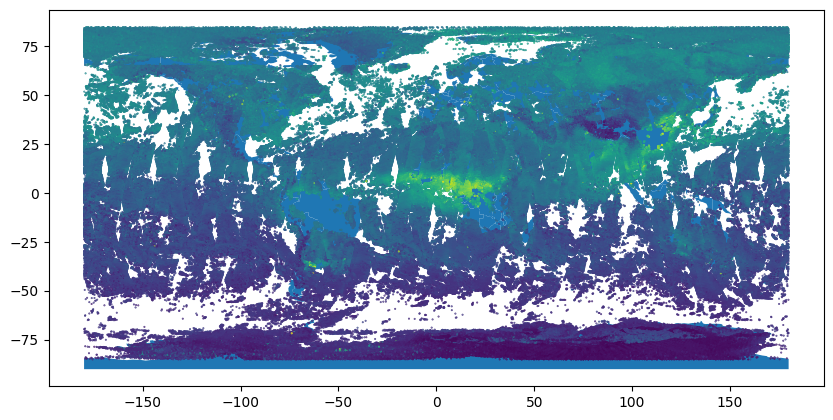

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_2.plot(ax=world.plot(figsize=(10, 6)), column=' COTotalColumn', markersize=0.2);